In [1]:
!pip install plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv
import pandas_datareader as pdr
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv('sheet.csv')

In [3]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2010/02/09  492.209351  494.314392  486.736237  491.961700  445.888885   
1  2010/02/10  495.255463  495.255463  486.389526  487.924957  442.230225   
2  2010/02/11  489.980469  505.112030  489.609009  502.808868  455.720215   
3  2010/02/15  508.678253  508.678253  499.069336  500.258057  453.408264   
4  2010/02/16  500.307587  505.706421  497.781525  504.096680  456.887390   

     Volume        RSI  Upper Bollinger band  Lower Bollinger band  ...  \
0   6595770  77.363565            538.556974            482.723033  ...   
1   8427562  77.450994            534.379680            480.362298  ...   
2  10822218  73.800489            529.706166            482.283331  ...   
3   6229609  62.190715            526.939071            481.947695  ...   
4   4646498  59.535849            524.309725            482.857629  ...   

       EMA 12      EMA 26  Volume Weighted Average Price  William % R  \
0  507.070528  526.112973                     525.687818   -82.107805   
1  504.125055  523.284232                     524.857180   -89.479146   
2  503.922565  521.767538                     524.114793   -50.645372   
3  503.358794  520.174243                     523.763755   -56.976014   
4  503.472315  518.983313                     523.507625   -47.449261   

   Commodity Channel Index  Rate of Change (10 days)  Aroon Up Aroon Down  \
0              -133.346702            -0.04683073594        32         88   
1              -126.800124            -0.04131185583        28         84   
2               -81.142246            -0.02121195237        24         80   
3               -62.805145            -0.03460143653        20         76   
4               -61.770626            -0.02644921791        16         72   

        MACD  BUY/SELL  
0 -19.042446         0  
1 -19.159176        -1  
2 -17.844973         1  
3 -16.815449        -1  
4 -15.510997         1  

[5 rows x 22 columns]

In [4]:
df.tail()

Date     Open         High     Low        Close    Adj Close  \
3108  2022/09/05  2531.00  2581.500000  2531.0  2569.800049  2569.800049   
3109  2022/09/06  2573.00  2606.000000  2572.0  2596.850098  2596.850098   
3110  2022/09/07  2575.00  2594.899902  2570.0  2581.750000  2581.750000   
3111  2022/09/08  2588.25  2598.000000  2571.0  2585.399902  2585.399902   
3112  2022/09/09  2610.00  2610.000000  2564.0  2571.750000  2571.750000   

       Volume        RSI  Upper Bollinger band  Lower Bollinger band  ...  \
3108  5227785  58.195854           2691.671064           2541.343236  ...   
3109  5030172  58.608005           2687.970925           2537.264810  ...   
3110  3455942  58.895007           2681.110820           2532.210643  ...   
3111  3256840  60.656396           2670.549281           2531.929304  ...   
3112  2981738  56.135250           2662.438820           2534.025466  ...   

           EMA 12       EMA 26  Volume Weighted Average Price  William % R  \
3108  2592.431907  2579.893536                    1019.179252   -70.833259   
3109  2593.111629  2581.149578                    1019.470203   -50.692916   
3110  2591.363686  2581.194053                    1019.668841   -61.157290   
3111  2590.446181  2581.505598                    1019.856298   -58.627907   
3112  2587.569845  2580.782961                    1020.027566   -68.087295   

      Commodity Channel Index  Rate of Change (10 days)  Aroon Up Aroon Down  \
3108               -92.978210            -0.01685255365        48          0   
3109               -29.493616           -0.003740504732        44          0   
3110               -53.368680            -0.02457686557        40          0   
3111               -54.556808            -0.02058910806        36         80   
3112               -64.801299            -0.02290991732        32         76   

           MACD  BUY/SELL  
3108  12.538371         1  
3109  11.962051         1  
3110  10.169633         0  
3111   8.940583         0  
3112   6.786885        -1  

[5 rows x 22 columns]

In [5]:
df.shape

(3113, 22)

In [6]:
dff=df.set_index('Date')

In [7]:
dff

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010/02/09   492.209351   494.314392   486.736237   491.961700   445.888885   
2010/02/10   495.255463   495.255463   486.389526   487.924957   442.230225   
2010/02/11   489.980469   505.112030   489.609009   502.808868   455.720215   
2010/02/15   508.678253   508.678253   499.069336   500.258057   453.408264   
2010/02/16   500.307587   505.706421   497.781525   504.096680   456.887390   
...                 ...          ...          ...          ...          ...   
2022/09/05  2531.000000  2581.500000  2531.000000  2569.800049  2569.800049   
2022/09/06  2573.000000  2606.000000  2572.000000  2596.850098  2596.850098   
2022/09/07  2575.000000  2594.899902  2570.000000  2581.750000  2581.750000   
2022/09/08  2588.250000  2598.000000  2571.000000  2585.399902  2585.399902   
2022/09/09  2610.000000  2610.000000  2564.000000  2571.750000  2571.750000   

              Volume        RSI  Upper Bollinger band  Lower Bollinger band  \
Date                                                                          
2010/02/09   6595770  77.363565            538.556974            482.723033   
2010/02/10   8427562  77.450994            534.379680            480.362298   
2010/02/11  10822218  73.800489            529.706166            482.283331   
2010/02/15   6229609  62.190715            526.939071            481.947695   
2010/02/16   4646498  59.535849            524.309725            482.857629   
...              ...        ...                   ...                   ...   
2022/09/05   5227785  58.195854           2691.671064           2541.343236   
2022/09/06   5030172  58.608005           2687.970925           2537.264810   
2022/09/07   3455942  58.895007           2681.110820           2532.210643   
2022/09/08   3256840  60.656396           2670.549281           2531.929304   
2022/09/09   2981738  56.135250           2662.438820           2534.025466   

            %K (5 days stochastic oscillator)  ...       EMA 12       EMA 26  \
Date                                           ...                             
2010/02/09                          24.863803  ...   507.070528   526.112973   
2010/02/10                          16.031785  ...   504.125055   523.284232   
2010/02/11                          89.620565  ...   503.922565   521.767538   
2010/02/15                          67.307688  ...   503.358794   520.174243   
2010/02/16                          79.444438  ...   503.472315   518.983313   
...                                       ...  ...          ...          ...   
2022/09/05                          34.106791  ...  2592.431907  2579.893536   
2022/09/06                          59.514946  ...  2593.111629  2581.149578   
2022/09/07                          69.800766  ...  2591.363686  2581.194053   
2022/09/08                          74.346095  ...  2590.446181  2581.505598   
2022/09/09                          51.582278  ...  2587.569845  2580.782961   

            Volume Weighted Average Price  William % R  \
Date                                                     
2010/02/09                     525.687818   -82.107805   
2010/02/10                     524.857180   -89.479146   
2010/02/11                     524.114793   -50.645372   
2010/02/15                     523.763755   -56.976014   
2010/02/16                     523.507625   -47.449261   
...                                   ...          ...   
2022/09/05                    1019.179252   -70.833259   
2022/09/06                    1019.470203   -50.692916   
2022/09/07                    1019.668841   -61.157290   
2022/09/08                    1019.856298   -58.627907   
2022/09/09                    1020.027566   -68.087295   

            Commodity Channel Index  Rate of Change (10 days) Aroon Up  \
Date                                                                     
2010/02/09         

In [8]:
type(dff)

pandas.core.frame.DataFrame

In [9]:
dff.columns 

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'Upper Bollinger band', 'Lower Bollinger band',
       '%K (5 days stochastic oscillator)', '%D Average(H,3)', 'EMA 12',
       'EMA 26', 'Volume Weighted Average Price', 'William % R',
       'Commodity Channel Index', 'Rate of Change (10 days)', 'Aroon Up',
       'Aroon Down', 'MACD', 'BUY/SELL'],
      dtype='object')

In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3113 entries, 2010/02/09 to 2022/09/09
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Open                               3113 non-null   float64
 1   High                               3113 non-null   float64
 2   Low                                3113 non-null   float64
 3   Close                              3113 non-null   float64
 4   Adj Close                          3113 non-null   float64
 5   Volume                             3113 non-null   int64  
 6   RSI                                3113 non-null   float64
 7   Upper Bollinger band               3113 non-null   float64
 8   Lower Bollinger band               3113 non-null   float64
 9   %K (5 days stochastic oscillator)  3113 non-null   float64
 10  %D Average(H,3)                    3113 non-null   float64
 11  EMA 12                             3113 non-nu

In [69]:
dff.isnull().sum()

Open                                 0
High                                 0
Low                                  0
Close                                0
Adj Close                            0
Volume                               0
RSI                                  0
Upper Bollinger band                 0
Lower Bollinger band                 0
%K (5 days stochastic oscillator)    0
%D Average(H,3)                      0
EMA 12                               0
EMA 26                               0
Volume Weighted Average Price        0
William % R                          0
Commodity Channel Index              0
Rate of Change (10 days)             0
Aroon Up                             0
Aroon Down                           0
MACD                                 0
BUY/SELL                             0
dtype: int64

In [70]:
dff.describe()

Open         High          Low        Close    Adj Close  \
count  3113.000000  3113.000000  3113.000000  3113.000000  3113.000000   
mean    945.129396   956.004267   933.666294   944.326296   922.772407   
std     695.165823   703.202803   686.630715   694.620074   701.402362   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     443.818054   448.251038   438.394470   443.917114   418.347961   
50%     521.605713   527.945618   516.999390   521.729553   490.580292   
75%    1273.924438  1284.821167  1263.077271  1269.813477  1252.394775   
max    2856.149902  2856.149902  2786.100098  2819.850098  2811.385742   

             Volume          RSI  Upper Bollinger band  Lower Bollinger band  \
count  3.113000e+03  3113.000000           3113.000000           3113.000000   
mean   8.624042e+06    48.146444            993.229684            886.743411   
std    5.796754e+06    16.466696            723.807091            658.621631   
min    0.000000e+00     2.965484            349.242536            151.923808   
25%    5.316182e+06    35.942027            480.210912            417.953452   
50%    7.095266e+06    48.595683            549.066522            495.945063   
75%    9.890146e+06    59.399001           1343.122350           1192.090262   
max    6.584835e+07    97.768657           2929.900430           2571.997583   

       %K (5 days stochastic oscillator)  %D Average(H,3)       EMA 12  \
count                        3113.000000      3113.000000  3113.000000   
mean                           50.713781        50.684522   940.655356   
std                            30.641557        25.527142   690.204087   
min                             0.000000         3.149804   302.954241   
25%                            21.428499        28.725757   440.643422   
50%                            51.582278        51.187024   517.420609   
75%                            79.459333        72.777937  1267.594897   
max                           100.000000        98.950732  2733.644147   

            EMA 26  Volume Weighted Average Price  William % R  \
count  3113.000000                    3113.000000  3113.000000   
mean    936.086906                     567.386371   -47.054140   
std     684.931987                     167.515458    30.707229   
min     340.654569                     444.571800  -100.000000   
25%     438.774956                     452.295320   -74.712631   
50%     517.048920                     493.680694   -44.403210   
75%    1269.707500                     603.926486   -19.094670   
max    2663.272290                    1020.027566    -0.253972   

       Commodity Channel Index     Aroon Up   Aroon Down         MACD  
count              3113.000000  3113.000000  3113.000000  3113.000000  
mean                 10.401490    51.665917    43.309990     4.568450  
std                 114.898730    34.645044    34.663744    23.625749  
min                -687.986684     0.000000     0.000000  -131.446857  
25%                 -75.401595    16.000000     8.000000    -6.138551  
50%                  18.600961    56.000000    40.000000     1.825364  
75%                  95.992017    84.000000    76.000000     9.740118  
max                 474.026800    96.000000    96.000000   119.209287

<AxesSubplot:xlabel='Date'>

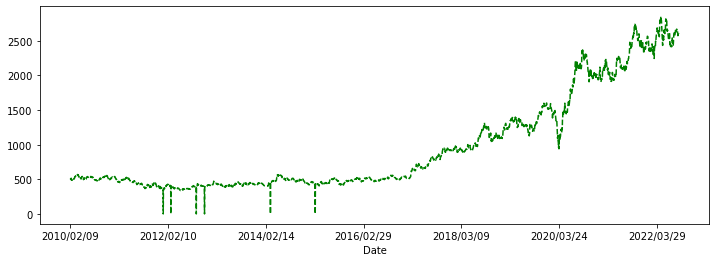

In [14]:
dff['High'].plot(figsize=(12,4),ls='--',c='green')

In [15]:
#Volume graph
fig = go.Figure(go.Bar(x=df.Date, y=df.Volume, name='Volume', marker_color='red'))
fig.show()

In [16]:
##OHLC GRAPH
fig = go.Figure([go.Ohlc(x=df.Date,
                         open=df.Open,
                         high=df.High,
                         low=df.Low,
                         close=df.Close)])
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [20]:
##Stochastic 
def stochastic(df, k, d):
    df = df.copy()
    low_min  = df['Low'].rolling(window=k).min()
    high_max = df['High'].rolling( window=k).max()
    df['stoch_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
    df['stoch_d'] = df['stoch_k'].rolling(window=d).mean()
    return df

stochs = stochastic(df, k=14, d=3)

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date.tail(365), y=stochs.stoch_k.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=df.Date.tail(365), y=stochs.stoch_d.tail(365), name='D stochastic'))
fig.show()

In [19]:
#MACD 
EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())
MACD = pd.Series(EMA_12 - EMA_26)
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=MACD, name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=MACD_signal, name='Signal line'), row=2, col=1)
fig.show()

In [18]:
#RSI
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

num_days = 365
df['RSI'] = RSI(df).fillna(0)
fig = go.Figure(go.Scatter(x=df.Date.tail(num_days), y=df.RSI.tail(num_days)))
fig.show()

In [17]:
## Moving Averages
df['EMA_9'] = df['Close'].ewm(5).mean().shift()
df['SMA_50'] = df['Close'].rolling(50).mean().shift()
df['SMA_100'] = df['Close'].rolling(100).mean().shift()
df['SMA_200'] = df['Close'].rolling(200).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_9, name='EMA 9'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_50, name='SMA 50'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_100, name='SMA 100'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_200, name='SMA 200'))
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

In [22]:
dff.index

Index(['2010/02/09', '2010/02/10', '2010/02/11', '2010/02/15', '2010/02/16',
       '2010/02/17', '2010/02/18', '2010/02/19', '2010/02/22', '2010/02/23',
       ...
       '2022/08/26', '2022/08/29', '2022/08/30', '2022/09/01', '2022/09/02',
       '2022/09/05', '2022/09/06', '2022/09/07', '2022/09/08', '2022/09/09'],
      dtype='object', name='Date', length=3113)

In [23]:
index=dff.loc['2022/08/19':'2022/09/09'].index
share_open=dff.loc['2022/08/19':'2022/09/09']['Open']

In [24]:
share_open

Date
2022/08/19    2650.000000
2022/08/22    2617.000000
2022/08/23    2594.000000
2022/08/24    2640.100098
2022/08/25    2648.949951
2022/08/26    2633.000000
2022/08/29    2585.000000
2022/08/30    2614.000000
2022/09/01    2582.649902
2022/09/02    2560.399902
2022/09/05    2531.000000
2022/09/06    2573.000000
2022/09/07    2575.000000
2022/09/08    2588.250000
2022/09/09    2610.000000
Name: Open, dtype: float64

In [25]:
index

Index(['2022/08/19', '2022/08/22', '2022/08/23', '2022/08/24', '2022/08/25',
       '2022/08/26', '2022/08/29', '2022/08/30', '2022/09/01', '2022/09/02',
       '2022/09/05', '2022/09/06', '2022/09/07', '2022/09/08', '2022/09/09'],
      dtype='object', name='Date')

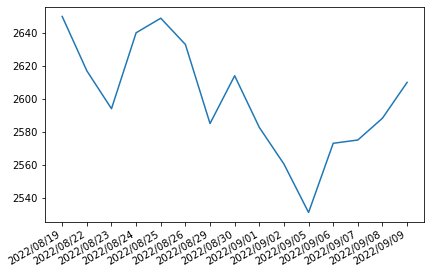

In [26]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

In [27]:
df

Date         Open         High          Low        Close  \
0     2010/02/09   492.209351   494.314392   486.736237   491.961700   
1     2010/02/10   495.255463   495.255463   486.389526   487.924957   
2     2010/02/11   489.980469   505.112030   489.609009   502.808868   
3     2010/02/15   508.678253   508.678253   499.069336   500.258057   
4     2010/02/16   500.307587   505.706421   497.781525   504.096680   
...          ...          ...          ...          ...          ...   
3108  2022/09/05  2531.000000  2581.500000  2531.000000  2569.800049   
3109  2022/09/06  2573.000000  2606.000000  2572.000000  2596.850098   
3110  2022/09/07  2575.000000  2594.899902  2570.000000  2581.750000   
3111  2022/09/08  2588.250000  2598.000000  2571.000000  2585.399902   
3112  2022/09/09  2610.000000  2610.000000  2564.000000  2571.750000   

        Adj Close    Volume        RSI  Upper Bollinger band  \
0      445.888885   6595770        NaN            538.556974   
1      442.230225   8427562   0.000000            534.379680   
2      455.720215  10822218   0.000000            529.706166   
3      453.408264   6229609   0.000000            526.939071   
4      456.887390   4646498   0.000000            524.309725   
...           ...       ...        ...                   ...   
3108  2569.800049   5227785  41.391995           2691.671064   
3109  2596.850098   5030172  42.756422           2687.970925   
3110  2581.750000   3455942  38.941941           2681.110820   
3111  2585.399902   3256840  39.931001           2670.549281   
3112  2571.750000   2981738  43.864750           2662.438820   

      Lower Bollinger band  ...  Commodity Channel Index  \
0               482.723033  ...              -133.346702   
1               480.362298  ...              -126.800124   
2               482.283331  ...               -81.142246   
3               481.947695  ...               -62.805145   
4               482.857629  ...               -61.770626   
...                    ...  ...                      ...   
3108           2541.343236  ...               -92.978210   
3109           2537.264810  ...               -29.493616   
3110           2532.210643  ...               -53.368680   
3111           2531.929304  ...               -54.556808   
3112           2534.025466  ...               -64.801299   

      Rate of Change (10 days)  Aroon Up  Aroon Down       MACD  BUY/SELL  \
0               -0.04683073594        32          88 -19.042446         0   
1               -0.04131185583        28          84 -19.159176        -1   
2               -0.02121195237        24          80 -17.844973         1   
3               -0.03460143653        20          76 -16.815449        -1   
4               -0.02644921791        16          72 -15.510997         1   
...                        ...       ...         ...        ...       ...   
3108            -0.01685255365        48           0  12.538371         1   
3109           -0.003740504732        44           0  11.962051         1   
3110            -0.02457686557        40           0  10.169633         0   
3111            -0.02058910806        36          80   8.940583         0   
3112            -0.02290991732        32          76   6.786885        -1   

            EMA_9       SMA_50      SMA_100      SMA_200  
0             NaN          NaN          NaN          NaN  
1      491.961700          NaN          NaN          NaN  
2      489.759840          NaN          NaN          NaN  
3      494.922093          NaN          NaN          NaN  
4      496.639780          NaN          NaN          NaN  
...           ...          ...          ...          ...  
3108  2596.329267  2520.415996  2576.388501  2503.238506  
3109  2591.907731  2521.699995  2575.930002  2503.198506  
3110  2592.731459  2524.337998  2575.796504  2503.593257  
3111  2590.901216  2525.971997  2576.003503  2504.182007  
3112  2589.984330  2527.826997  2576.341003  2504.742506  

[3113 rows x 26 columns

In [28]:
df['Date']=pd.to_datetime(df['Date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               3113 non-null   datetime64[ns]
 1   Open                               3113 non-null   float64       
 2   High                               3113 non-null   float64       
 3   Low                                3113 non-null   float64       
 4   Close                              3113 non-null   float64       
 5   Adj Close                          3113 non-null   float64       
 6   Volume                             3113 non-null   int64         
 7   RSI                                3112 non-null   float64       
 8   Upper Bollinger band               3113 non-null   float64       
 9   Lower Bollinger band               3113 non-null   float64       
 10  %K (5 days stochastic oscillator)  3

In [30]:
df=df.set_index('Date',drop=True)

In [31]:
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-02-09   492.209351   494.314392   486.736237   491.961700   445.888885   
2010-02-10   495.255463   495.255463   486.389526   487.924957   442.230225   
2010-02-11   489.980469   505.112030   489.609009   502.808868   455.720215   
2010-02-15   508.678253   508.678253   499.069336   500.258057   453.408264   
2010-02-16   500.307587   505.706421   497.781525   504.096680   456.887390   
...                 ...          ...          ...          ...          ...   
2022-09-05  2531.000000  2581.500000  2531.000000  2569.800049  2569.800049   
2022-09-06  2573.000000  2606.000000  2572.000000  2596.850098  2596.850098   
2022-09-07  2575.000000  2594.899902  2570.000000  2581.750000  2581.750000   
2022-09-08  2588.250000  2598.000000  2571.000000  2585.399902  2585.399902   
2022-09-09  2610.000000  2610.000000  2564.000000  2571.750000  2571.750000   

              Volume        RSI  Upper Bollinger band  Lower Bollinger band  \
Date                                                                          
2010-02-09   6595770        NaN            538.556974            482.723033   
2010-02-10   8427562   0.000000            534.379680            480.362298   
2010-02-11  10822218   0.000000            529.706166            482.283331   
2010-02-15   6229609   0.000000            526.939071            481.947695   
2010-02-16   4646498   0.000000            524.309725            482.857629   
...              ...        ...                   ...                   ...   
2022-09-05   5227785  41.391995           2691.671064           2541.343236   
2022-09-06   5030172  42.756422           2687.970925           2537.264810   
2022-09-07   3455942  38.941941           2681.110820           2532.210643   
2022-09-08   3256840  39.931001           2670.549281           2531.929304   
2022-09-09   2981738  43.864750           2662.438820           2534.025466   

            %K (5 days stochastic oscillator)  ...  Commodity Channel Index  \
Date                                           ...                            
2010-02-09                          24.863803  ...              -133.346702   
2010-02-10                          16.031785  ...              -126.800124   
2010-02-11                          89.620565  ...               -81.142246   
2010-02-15                          67.307688  ...               -62.805145   
2010-02-16                          79.444438  ...               -61.770626   
...                                       ...  ...                      ...   
2022-09-05                          34.106791  ...               -92.978210   
2022-09-06                          59.514946  ...               -29.493616   
2022-09-07                          69.800766  ...               -53.368680   
2022-09-08                          74.346095  ...               -54.556808   
2022-09-09                          51.582278  ...               -64.801299   

            Rate of Change (10 days)  Aroon Up  Aroon Down       MACD  \
Date                                                                    
2010-02-09            -0.04683073594        32          88 -19.042446   
2010-02-10            -0.04131185583        28          84 -19.159176   
2010-02-11            -0.02121195237        24          80 -17.844973   
2010-02-15            -0.03460143653        20          76 -16.815449   
2010-02-16            -0.02644921791        16          72 -15.510997   
...                              ...       ...         ...        ...   
2022-09-05            -0.01685255365        48           0  12.538371   
2022-09-06           -0.003740504732        44           0  11.962051   
2022-09-07            -0.02457686557        40           0  10.169633   
2022-09-08            -0.02058910806        36          80   8.940583   
2022-09-09            -0.02290991732        32          76 

In [32]:
datetime(2022,9,5)

datetime.datetime(2022, 9, 5, 0, 0)

In [33]:
datetime.now()

datetime.datetime(2022, 10, 3, 12, 21, 6, 185396)

In [34]:
##year and frequency
df.resample(rule='A').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-12-31   458.181885   466.379181   453.204071   455.284363   415.462311   
2011-12-31   353.152466   356.892029   341.265137   343.221588   315.867767   
2012-12-31     0.000000     0.000000     0.000000     0.000000     0.000000   
2013-12-31   379.898926   385.322540   378.363495   380.171356   354.134918   
2014-12-31     0.000000     0.000000     0.000000     0.000000     0.000000   
2015-12-31     0.000000     0.000000     0.000000     0.000000     0.000000   
2016-12-31   454.690002   462.565338   439.880371   449.018738   431.726685   
2017-12-31   503.725189   509.569794   501.644897   503.180359   488.825897   
2018-12-31   868.764954   887.437988   862.821289   874.411438   855.695740   
2019-12-31  1084.718018  1090.166260  1070.948486  1082.489136  1065.852417   
2020-12-31   907.596863   941.079529   867.427673   875.748779   867.064575   
2021-12-31  1859.400024  1905.000000  1830.000000  1841.949951  1830.532349   
2022-12-31  2211.500000  2246.000000  2180.000000  2235.500000  2228.789795   

             Volume        RSI  Upper Bollinger band  Lower Bollinger band  \
Date                                                                         
2010-12-31  2668414   0.000000            489.505172            445.622261   
2011-12-31  2838132  10.800395            380.713739            342.441891   
2012-12-31        0   2.231343            349.242536            151.923808   
2013-12-31  2297148  20.033075            396.575842            369.396161   
2014-12-31        0   7.790425            406.479849            183.504878   
2015-12-31        0   5.120129            431.411575            182.310227   
2016-12-31  1840098   9.810659            482.605484            440.842250   
2017-12-31  1617344  23.806130            521.446092            468.551091   
2018-12-31  1296168  14.450306            905.336088            858.659539   
2019-12-31  1391348  19.624140           1117.971404           1029.965940   
2020-12-31  2411900  10.045715           1143.662675            771.716215   
2021-12-31   787160  24.042500           2012.871770           1802.526430   
2022-12-31  2502073  16.131408           2404.559160           2213.663334   

            %K (5 days stochastic oscillator)  ...  Commodity Channel Index  \
Date                                           ...                            
2010-12-31                           2.610293  ...              -345.926449   
2011-12-31                           2.821355  ...              -256.370228   
2012-12-31                           0.000000  ...              -687.986684   
2013-12-31                           1.486142  ...              -208.693703   
2014-12-31                           0.000000  ...              -659.155879   
2015-12-31                           0.000000  ...              -679.083987   
2016-12-31                           3.690647  ...              -243.849220   
2017-12-31                           2.712319  ...              -178.695481   
2018-12-31                           2.366019  ...              -377.114692   
2019-12-31                           2.716446  ...              -254.705451   
2020-12-31                           2.368421  ...              -250.761646   
2021-12-31                           2.124647  ...              -238.459294   
2022-12-31                           2.543452  ...              -212.788060   

            Rate of Change (10 days)  Aroon Up  Aroon Down        MACD  \
Date                                                                     
2010-12-31          -0.0005385733371         0           0  -19.159176   
2011-12-31          -0.0009212251502         0           0  -16.543351   
2012-12-31                   #DIV/0!         0           0  -37.700329   
2013-12-31          -0.0004165024519         0           0   -9.602279   
2014-12-31                   #DI

In [35]:
df.resample(rule='A').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-12-31   567.124207   569.452148   556.277039   559.546082   507.143890   
2011-12-31   535.573303   540.575867   532.229980   537.703125   490.672150   
2012-12-31   431.014404   436.660889   421.653137   432.772736   403.133850   
2013-12-31   464.645630   473.016266   454.714752   457.513245   430.920563   
2014-12-31   560.932922   567.248047   550.828674   558.431641   530.759766   
2015-12-31   521.803833   528.911438   515.711548   520.268372   500.232422   
2016-12-31   553.255676   559.471741   548.104492   550.184814   534.489441   
2017-12-31   946.973633   950.490295   938.503906   943.605591   923.408875   
2018-12-31  1303.939941  1316.520752  1282.839966  1306.614624  1286.533325   
2019-12-31  1599.835205  1602.361206  1581.112671  1594.832642  1579.017822   
2020-12-31  2325.000000  2369.350098  2310.550049  2324.550049  2310.140869   
2021-12-31  2742.750000  2751.350098  2708.000000  2731.850098  2723.649902   
2022-12-31  2856.149902  2856.149902  2786.100098  2819.850098  2811.385742   

              Volume        RSI  Upper Bollinger band  Lower Bollinger band  \
Date                                                                          
2010-12-31  33257378  81.149100            570.166377            530.535813   
2011-12-31  41037923  76.441363            545.353559            516.556299   
2012-12-31  19581744  96.467216            617.653558            405.667863   
2013-12-31  22213692  81.656369            469.620311            435.131991   
2014-12-31  25570753  94.791716            693.555853            524.896378   
2015-12-31  22846211  92.020076            642.926277            489.469514   
2016-12-31  33136776  88.415942            558.918689            529.173360   
2017-12-31  58759604  91.399519            977.320408            903.112524   
2018-12-31  26144187  97.072935           1314.809427           1201.936065   
2019-12-31  48377710  86.722583           1613.468152           1529.846005   
2020-12-31  65848350  90.441524           2424.387729           2183.831319   
2021-12-31  42209687  90.997797           2781.348791           2571.997583   
2022-12-31  37841671  86.760350           2929.900430           2570.138557   

            %K (5 days stochastic oscillator)  ...  Commodity Channel Index  \
Date                                           ...                            
2010-12-31                          97.813670  ...               208.038365   
2011-12-31                          97.774502  ...               241.816220   
2012-12-31                          99.621113  ...               293.613467   
2013-12-31                          97.526904  ...               319.183238   
2014-12-31                          99.129583  ...               468.939103   
2015-12-31                         100.000000  ...               372.280578   
2016-12-31                          96.470518  ...               264.343112   
2017-12-31                          98.375320  ...               392.555675   
2018-12-31                          97.918037  ...               258.363915   
2019-12-31                          98.393590  ...               337.172531   
2020-12-31                          97.845869  ...               474.026800   
2021-12-31                          97.607793  ...               299.153074   
2022-12-31                          98.068835  ...               260.230788   

            Rate of Change (10 days)  Aroon Up  Aroon Down        MACD  \
Date                                                                     
2010-12-31              0.1249864393        96          96   12.072988   
2011-12-31              0.1262858348        96          96    9.312678   
2012-12-31              0.1460831214        96          96   16.784545   
2013-12-31              0.1103613132        96          96   12.574695   
2014-12-31       

<AxesSubplot:xlabel='Date'>

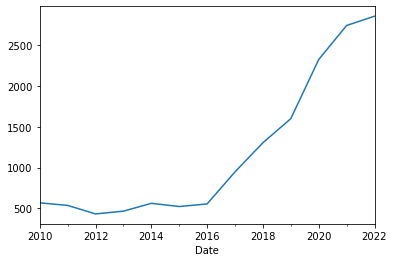

In [36]:
df.resample(rule='A').max()['Open'].plot()

In [37]:
##Quaterly start frequency
df.resample(rule='QS').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-01   546.668152   550.283875   542.433289   545.058411   494.013153   
2010-04-01   567.124207   569.452148   556.277039   559.546082   507.143890   
2010-07-01   536.910645   542.086548   529.035278   533.072021   486.446075   
2010-10-01   555.236938   557.168579   545.107910   550.704895   502.536835   
2011-01-01   535.573303   540.575867   532.229980   537.703125   490.672150   
2011-04-01   521.308533   527.945618   515.117188   520.392212   474.875336   
2011-07-01   449.241638   449.241638   435.447388   437.280029   402.430054   
2011-10-01   448.251038   448.251038   437.899139   445.774506   410.247559   
2012-01-01   424.352570   428.290222   418.532715   425.169800   391.284973   
2012-04-01   373.856201   377.868195   368.630737   372.816071   343.103668   
2012-07-01   431.014404   436.660889   421.653137   432.772736   403.133850   
2012-10-01   425.912781   426.952911   420.563477   424.872620   395.774811   
2013-01-01   464.645630   473.016266   454.714752   457.191284   425.880066   
2013-04-01   430.667694   432.401276   419.028046   427.250092   402.416443   
2013-07-01   455.210052   459.593506   452.238220   457.513245   430.920563   
2013-10-01   450.777069   458.924866   447.433777   453.055481   426.721893   
2014-01-01   453.823212   465.487640   452.312531   461.005127   434.209534   
2014-04-01   560.932922   567.248047   550.828674   558.431641   530.759766   
2014-07-01   516.058289   516.751709   509.272614   515.637268   490.085999   
2014-10-01   497.286224   503.898560   490.426239   496.468964   471.867523   
2015-01-01   465.140930   467.468872   458.602905   464.397980   441.385773   
2015-04-01   495.255463   502.288818   493.026611   497.558655   478.397278   
2015-07-01   521.803833   528.911438   515.711548   520.268372   500.232422   
2015-10-01   502.734589   505.062500   498.846436   502.932709   483.564362   
2016-01-01   532.452881   539.758606   527.796997   533.369202   512.828735   
2016-04-01   529.580139   529.926819   522.744873   528.019897   512.956848   
2016-07-01   553.255676   559.471741   548.104492   550.036194   534.345093   
2016-10-01   551.769775   557.837280   548.054993   550.184814   534.489441   
2017-01-01   653.233032   662.544739   642.930664   654.248352   635.584290   
2017-04-01   723.145325   726.983948   708.583313   712.496277   692.170593   
2017-07-01   848.061218   864.307251   837.164490   841.027893   823.026733   
2017-10-01   946.973633   950.490295   938.503906   943.605591   923.408875   
2018-01-01   972.531372   981.644958   965.844727   974.017273   953.169617   
2018-04-01  1018.743347  1026.271973  1011.710022  1022.260010  1000.379822   
2018-07-01  1303.939941  1316.520752  1282.839966  1306.614624  1286.533325   
2018-10-01  1245.890259  1245.890259  1192.694458  1220.134399  1201.382324   
2019-01-01  1365.011108  1374.966675  1351.192017  1363.624146  1342.666626   
2019-04-01  1394.729370  1404.189697  1389.479126  1395.620850  1374.171631   
2019-07-01  1297.699097  1323.207275  1293.290894  1319.740234  1306.653320   
2019-10-01  1599.835205  1602.361206  1581.112671  1594.832642  1579.017822   
2020-01-01  1593.891479  1593.891479  1538.615479  1566.154419  1550.624023   
2020-04-01  1773.400024  1804.199951  1735.000000  1759.400024  1741.953247   
2020-07-01  2325.000000  2369.350098  2310.550049  2324.550049  2310.140869   
2020-10-01  2290.000000  2309.000000  2268.500000  2287.500000  2273.320557   
2021-01-01  2207.000000  2231.899902  2170.250000  2202.100098  2188.449951   
2021-04-01  2261.000000  2274.899902  2240.300049  2250.000000  2243.246094   
2021-07-01  2570.000000  2570.000000  2520.050049  2548.050049  2540.401611   
2021-10-01  2742.750000  2751.350098  2708.000000  2731.850098  2723.649902   
2022-01-01  2664.949951  2688.000000  2628.600098  2672.949951  2664.

<AxesSubplot:xlabel='Date'>

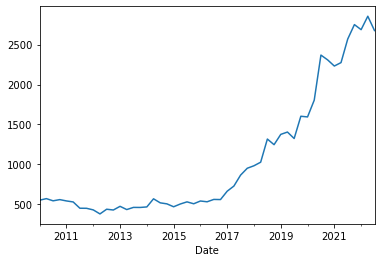

In [38]:
df.resample(rule='QS').max()['High'].plot()

In [39]:
##business and frequency (BUSINESS YEAR END)
df.resample(rule='BA').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-12-31   567.124207   569.452148   556.277039   559.546082   507.143890   
2011-12-30   535.573303   540.575867   532.229980   537.703125   490.672150   
2012-12-31   431.014404   436.660889   421.653137   432.772736   403.133850   
2013-12-31   464.645630   473.016266   454.714752   457.513245   430.920563   
2014-12-31   560.932922   567.248047   550.828674   558.431641   530.759766   
2015-12-31   521.803833   528.911438   515.711548   520.268372   500.232422   
2016-12-30   553.255676   559.471741   548.104492   550.184814   534.489441   
2017-12-29   946.973633   950.490295   938.503906   943.605591   923.408875   
2018-12-31  1303.939941  1316.520752  1282.839966  1306.614624  1286.533325   
2019-12-31  1599.835205  1602.361206  1581.112671  1594.832642  1579.017822   
2020-12-31  2325.000000  2369.350098  2310.550049  2324.550049  2310.140869   
2021-12-31  2742.750000  2751.350098  2708.000000  2731.850098  2723.649902   
2022-12-30  2856.149902  2856.149902  2786.100098  2819.850098  2811.385742   

              Volume        RSI  Upper Bollinger band  Lower Bollinger band  \
Date                                                                          
2010-12-31  33257378  81.149100            570.166377            530.535813   
2011-12-30  41037923  76.441363            545.353559            516.556299   
2012-12-31  19581744  96.467216            617.653558            405.667863   
2013-12-31  22213692  81.656369            469.620311            435.131991   
2014-12-31  25570753  94.791716            693.555853            524.896378   
2015-12-31  22846211  92.020076            642.926277            489.469514   
2016-12-30  33136776  88.415942            558.918689            529.173360   
2017-12-29  58759604  91.399519            977.320408            903.112524   
2018-12-31  26144187  97.072935           1314.809427           1201.936065   
2019-12-31  48377710  86.722583           1613.468152           1529.846005   
2020-12-31  65848350  90.441524           2424.387729           2183.831319   
2021-12-31  42209687  90.997797           2781.348791           2571.997583   
2022-12-30  37841671  86.760350           2929.900430           2570.138557   

            %K (5 days stochastic oscillator)  ...  Commodity Channel Index  \
Date                                           ...                            
2010-12-31                          97.813670  ...               208.038365   
2011-12-30                          97.774502  ...               241.816220   
2012-12-31                          99.621113  ...               293.613467   
2013-12-31                          97.526904  ...               319.183238   
2014-12-31                          99.129583  ...               468.939103   
2015-12-31                         100.000000  ...               372.280578   
2016-12-30                          96.470518  ...               264.343112   
2017-12-29                          98.375320  ...               392.555675   
2018-12-31                          97.918037  ...               258.363915   
2019-12-31                          98.393590  ...               337.172531   
2020-12-31                          97.845869  ...               474.026800   
2021-12-31                          97.607793  ...               299.153074   
2022-12-30                          98.068835  ...               260.230788   

            Rate of Change (10 days)  Aroon Up  Aroon Down        MACD  \
Date                                                                     
2010-12-31              0.1249864393        96          96   12.072988   
2011-12-30              0.1262858348        96          96    9.312678   
2012-12-31              0.1460831214        96          96   16.784545   
2013-12-31              0.1103613132        96          96   12.574695   
2014-12-31       

In [40]:
##business quarters
df.resample(rule='BQS').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-01   546.668152   550.283875   542.433289   545.058411   494.013153   
2010-04-01   567.124207   569.452148   556.277039   559.546082   507.143890   
2010-07-01   536.910645   542.086548   529.035278   533.072021   486.446075   
2010-10-01   555.236938   557.168579   545.107910   550.704895   502.536835   
2011-01-03   535.573303   540.575867   532.229980   537.703125   490.672150   
2011-04-01   521.308533   527.945618   515.117188   520.392212   474.875336   
2011-07-01   449.241638   449.241638   435.447388   437.280029   402.430054   
2011-10-03   448.251038   448.251038   437.899139   445.774506   410.247559   
2012-01-02   424.352570   428.290222   418.532715   425.169800   391.284973   
2012-04-02   373.856201   377.868195   368.630737   372.816071   343.103668   
2012-07-02   431.014404   436.660889   421.653137   432.772736   403.133850   
2012-10-01   425.912781   426.952911   420.563477   424.872620   395.774811   
2013-01-01   464.645630   473.016266   454.714752   457.191284   425.880066   
2013-04-01   430.667694   432.401276   419.028046   427.250092   402.416443   
2013-07-01   455.210052   459.593506   452.238220   457.513245   430.920563   
2013-10-01   450.777069   458.924866   447.433777   453.055481   426.721893   
2014-01-01   453.823212   465.487640   452.312531   461.005127   434.209534   
2014-04-01   560.932922   567.248047   550.828674   558.431641   530.759766   
2014-07-01   516.058289   516.751709   509.272614   515.637268   490.085999   
2014-10-01   497.286224   503.898560   490.426239   496.468964   471.867523   
2015-01-01   465.140930   467.468872   458.602905   464.397980   441.385773   
2015-04-01   495.255463   502.288818   493.026611   497.558655   478.397278   
2015-07-01   521.803833   528.911438   515.711548   520.268372   500.232422   
2015-10-01   502.734589   505.062500   498.846436   502.932709   483.564362   
2016-01-01   532.452881   539.758606   527.796997   533.369202   512.828735   
2016-04-01   529.580139   529.926819   522.744873   528.019897   512.956848   
2016-07-01   553.255676   559.471741   548.104492   550.036194   534.345093   
2016-10-03   551.769775   557.837280   548.054993   550.184814   534.489441   
2017-01-02   653.233032   662.544739   642.930664   654.248352   635.584290   
2017-04-03   723.145325   726.983948   708.583313   712.496277   692.170593   
2017-07-03   848.061218   864.307251   837.164490   841.027893   823.026733   
2017-10-02   946.973633   950.490295   938.503906   943.605591   923.408875   
2018-01-01   972.531372   981.644958   965.844727   974.017273   953.169617   
2018-04-02  1018.743347  1026.271973  1011.710022  1022.260010  1000.379822   
2018-07-02  1303.939941  1316.520752  1282.839966  1306.614624  1286.533325   
2018-10-01  1245.890259  1245.890259  1192.694458  1220.134399  1201.382324   
2019-01-01  1365.011108  1374.966675  1351.192017  1363.624146  1342.666626   
2019-04-01  1394.729370  1404.189697  1389.479126  1395.620850  1374.171631   
2019-07-01  1297.699097  1323.207275  1293.290894  1319.740234  1306.653320   
2019-10-01  1599.835205  1602.361206  1581.112671  1594.832642  1579.017822   
2020-01-01  1593.891479  1593.891479  1538.615479  1566.154419  1550.624023   
2020-04-01  1773.400024  1804.199951  1735.000000  1759.400024  1741.953247   
2020-07-01  2325.000000  2369.350098  2310.550049  2324.550049  2310.140869   
2020-10-01  2290.000000  2309.000000  2268.500000  2287.500000  2273.320557   
2021-01-01  2207.000000  2231.899902  2170.250000  2202.100098  2188.449951   
2021-04-01  2261.000000  2274.899902  2240.300049  2250.000000  2243.246094   
2021-07-01  2570.000000  2570.000000  2520.050049  2548.050049  2540.401611   
2021-10-01  2742.750000  2751.350098  2708.000000  2731.850098  2723.649902   
2022-01-03  2664.949951  2688.000000  2628.600098  2672.949951  2664.

<AxesSubplot:xlabel='Date'>

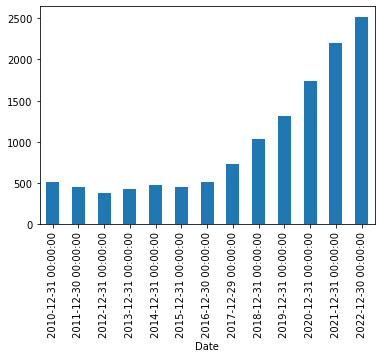

In [41]:
df['Open'].resample(rule='BA').mean().plot(kind='bar')

In [42]:
df['Open'].resample(rule='M').mean() ##monthly

Date
2010-02-28     493.720029
2010-03-31     518.651562
2010-04-30     538.988425
2010-05-31     508.828006
2010-06-30     518.278151
                 ...     
2022-05-31    2572.945219
2022-06-30    2624.993186
2022-07-31    2439.340472
2022-08-31    2606.609998
2022-09-30    2574.328543
Freq: M, Name: Open, Length: 152, dtype: float64

<AxesSubplot:xlabel='Date'>

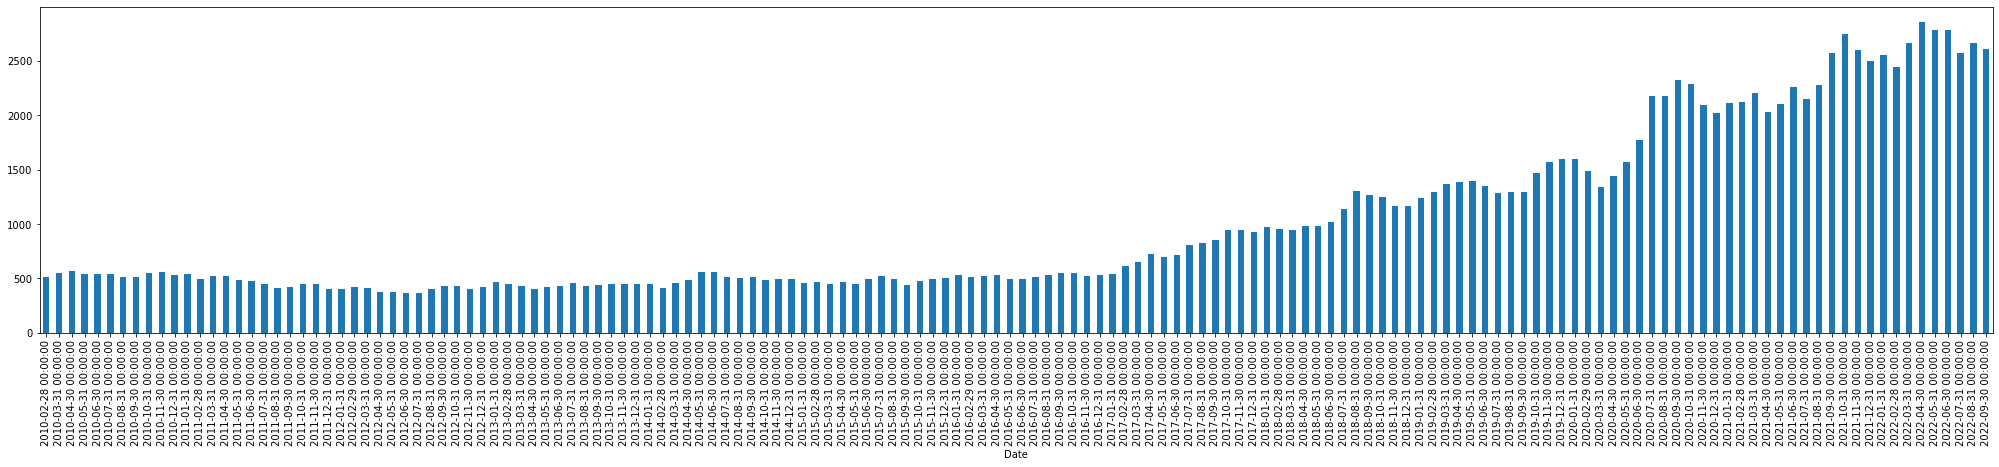

In [43]:
plt.tight_layout()
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(35,6))

In [44]:
df['High'].rolling(10).mean().head(20)

Date
2010-02-09           NaN
2010-02-10           NaN
2010-02-11           NaN
2010-02-15           NaN
2010-02-16           NaN
2010-02-17           NaN
2010-02-18           NaN
2010-02-19           NaN
2010-02-22           NaN
2010-02-23    501.241232
2010-02-24    500.632007
2010-02-25    499.894003
2010-02-26    498.665649
2010-03-02    497.278793
2010-03-03    497.625507
2010-03-04    497.734473
2010-03-05    497.122772
2010-03-08    498.707748
2010-03-09    499.292209
2010-03-10    501.070352
Name: High, dtype: float64

In [45]:
df['Open:10days rolling']=df['Open'].rolling(30).mean()
df['Open:30days rolling']=df['Open'].rolling(40).mean()
df['Open:50days rolling']=df['Open'].rolling(50).mean()

<AxesSubplot:xlabel='Date'>

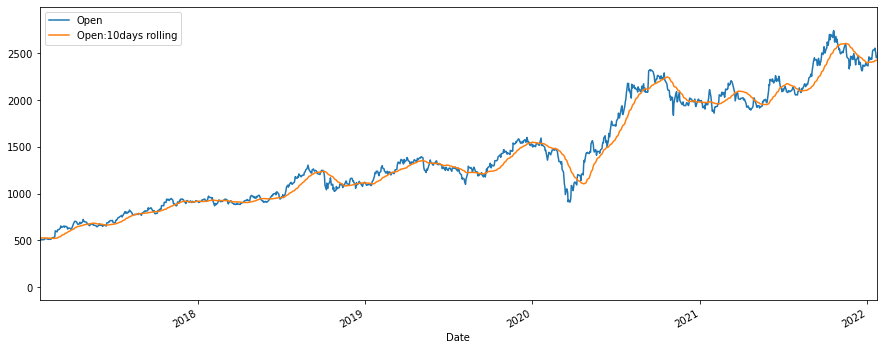

In [46]:
df[['Open','Open:10days rolling']].plot(xlim=['2017-01-20','2022-01-22' ],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

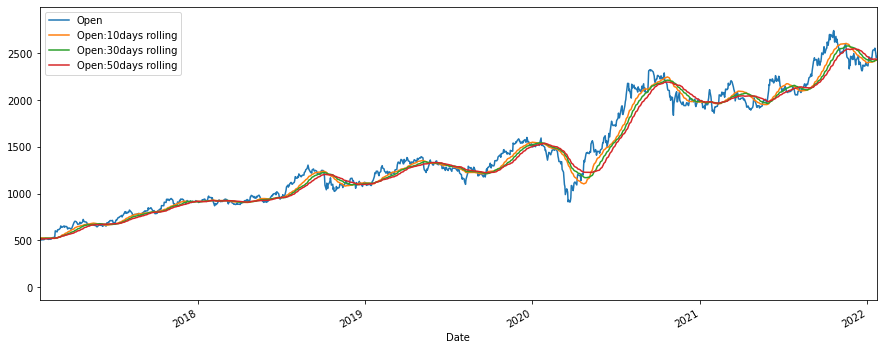

In [47]:
df[['Open','Open:10days rolling','Open:30days rolling','Open:50days rolling']].plot(xlim=['2017-01-20','2022-01-22' ],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

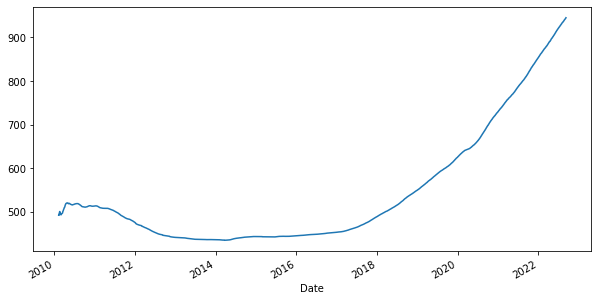

In [48]:
##expanding  CMA cumulative moving average of the open stock wrt different years
df['Open'].expanding().mean().plot(figsize=(10,5))

In [49]:
##EWMA- Exponential Weighted Moving average, SMOOTHING FACTOR - 0.1
df['EMA_5days']=df['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

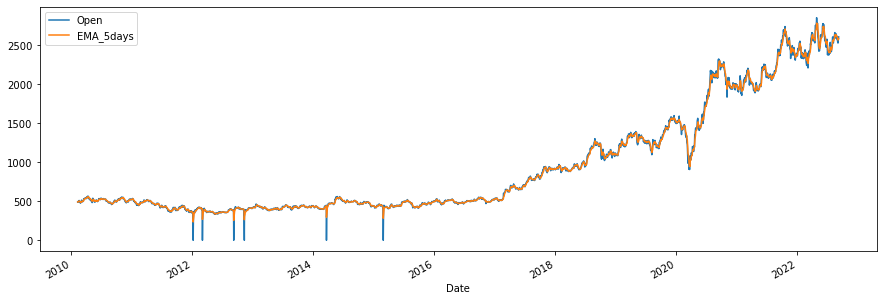

In [50]:
df[['Open','EMA_5days']].plot(figsize=(15,5))

In [41]:
df

Date         Open         High          Low        Close  \
0     2010/02/09   492.209351   494.314392   486.736237   491.961700   
1     2010/02/10   495.255463   495.255463   486.389526   487.924957   
2     2010/02/11   489.980469   505.112030   489.609009   502.808868   
3     2010/02/15   508.678253   508.678253   499.069336   500.258057   
4     2010/02/16   500.307587   505.706421   497.781525   504.096680   
...          ...          ...          ...          ...          ...   
3108  2022/09/05  2531.000000  2581.500000  2531.000000  2569.800049   
3109  2022/09/06  2573.000000  2606.000000  2572.000000  2596.850098   
3110  2022/09/07  2575.000000  2594.899902  2570.000000  2581.750000   
3111  2022/09/08  2588.250000  2598.000000  2571.000000  2585.399902   
3112  2022/09/09  2610.000000  2610.000000  2564.000000  2571.750000   

        Adj Close    Volume        RSI  Upper Bollinger band  \
0      445.888885   6595770  77.363565            538.556974   
1      442.230225   8427562  77.450994            534.379680   
2      455.720215  10822218  73.800489            529.706166   
3      453.408264   6229609  62.190715            526.939071   
4      456.887390   4646498  59.535849            524.309725   
...           ...       ...        ...                   ...   
3108  2569.800049   5227785  58.195854           2691.671064   
3109  2596.850098   5030172  58.608005           2687.970925   
3110  2581.750000   3455942  58.895007           2681.110820   
3111  2585.399902   3256840  60.656396           2670.549281   
3112  2571.750000   2981738  56.135250           2662.438820   

      Lower Bollinger band  ...       EMA 12       EMA 26  \
0               482.723033  ...   507.070528   526.112973   
1               480.362298  ...   504.125055   523.284232   
2               482.283331  ...   503.922565   521.767538   
3               481.947695  ...   503.358794   520.174243   
4               482.857629  ...   503.472315   518.983313   
...                    ...  ...          ...          ...   
3108           2541.343236  ...  2592.431907  2579.893536   
3109           2537.264810  ...  2593.111629  2581.149578   
3110           2532.210643  ...  2591.363686  2581.194053   
3111           2531.929304  ...  2590.446181  2581.505598   
3112           2534.025466  ...  2587.569845  2580.782961   

      Volume Weighted Average Price  William % R  Commodity Channel Index  \
0                        525.687818   -82.107805              -133.346702   
1                        524.857180   -89.479146              -126.800124   
2                        524.114793   -50.645372               -81.142246   
3                        523.763755   -56.976014               -62.805145   
4                        523.507625   -47.449261               -61.770626   
...                             ...          ...                      ...   
3108                    1019.179252   -70.833259               -92.978210   
3109                    1019.470203   -50.692916               -29.493616   
3110                    1019.668841   -61.157290               -53.368680   
3111                    1019.856298   -58.627907               -54.556808   
3112                    1020.027566   -68.087295               -64.801299   

      Rate of Change (10 days)  Aroon Up Aroon Down       MACD  BUY/SELL  
0               -0.04683073594        32         88 -19.042446         0  
1               -0.04131185583        28         84 -19.159176        -1  
2               -0.02121195237        24         80 -17.844973         1  
3               -0.03460143653        20         76 -16.815449        -1  
4               -0.02644921791        16         72 -15.510997         1  
...                        ...       ...        ...        ...       ...  
3108            -0.01685255365        48          0  12.538371         1  
3109           -0.003740504732        44          0  11.962051         1  
3110            -0.02457686557        40     

In [42]:
outliers=[]
def detect_outliers(df):
    threshold=3
    mean=np.mean(df)
    std=np.std(df)
    
    for i in df:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [43]:
dataset=df[['RSI','Upper Bollinger band','Lower Bollinger band','%K (5 days stochastic oscillator)','EMA 12','EMA 26','Volume Weighted Average Price','William % R','Commodity Channel Index','Rate of Change (10 days)','Aroon Up','Aroon Down','MACD']]

In [44]:
dataset

RSI  Upper Bollinger band  Lower Bollinger band  \
0     77.363565            538.556974            482.723033   
1     77.450994            534.379680            480.362298   
2     73.800489            529.706166            482.283331   
3     62.190715            526.939071            481.947695   
4     59.535849            524.309725            482.857629   
...         ...                   ...                   ...   
3108  58.195854           2691.671064           2541.343236   
3109  58.608005           2687.970925           2537.264810   
3110  58.895007           2681.110820           2532.210643   
3111  60.656396           2670.549281           2531.929304   
3112  56.135250           2662.438820           2534.025466   

      %K (5 days stochastic oscillator)       EMA 12       EMA 26  \
0                             24.863803   507.070528   526.112973   
1                             16.031785   504.125055   523.284232   
2                             89.620565   503.922565   521.767538   
3                             67.307688   503.358794   520.174243   
4                             79.444438   503.472315   518.983313   
...                                 ...          ...          ...   
3108                          34.106791  2592.431907  2579.893536   
3109                          59.514946  2593.111629  2581.149578   
3110                          69.800766  2591.363686  2581.194053   
3111                          74.346095  2590.446181  2581.505598   
3112                          51.582278  2587.569845  2580.782961   

      Volume Weighted Average Price  William % R  Commodity Channel Index  \
0                        525.687818   -82.107805              -133.346702   
1                        524.857180   -89.479146              -126.800124   
2                        524.114793   -50.645372               -81.142246   
3                        523.763755   -56.976014               -62.805145   
4                        523.507625   -47.449261               -61.770626   
...                             ...          ...                      ...   
3108                    1019.179252   -70.833259               -92.978210   
3109                    1019.470203   -50.692916               -29.493616   
3110                    1019.668841   -61.157290               -53.368680   
3111                    1019.856298   -58.627907               -54.556808   
3112                    1020.027566   -68.087295               -64.801299   

     Rate of Change (10 days)  Aroon Up  Aroon Down       MACD  
0              -0.04683073594        32          88 -19.042446  
1              -0.04131185583        28          84 -19.159176  
2              -0.02121195237        24          80 -17.844973  
3              -0.03460143653        20          76 -16.815449  
4              -0.02644921791        16          72 -15.510997  
...                       ...       ...         ...        ...  
3108           -0.01685255365        48           0  12.538371  
3109          -0.003740504732        44           0  11.962051  
3110           -0.02457686557        40           0  10.169633  
3111           -0.02058910806        36          80   8.940583  
3112           -0.02290991732        32          76   6.786885  

[3113 rows x 13 columns]

In [45]:
X=np.array(dataset['RSI']).reshape(-1,1)
Y=np.array(dataset['Upper Bollinger band']).reshape(-1,1)
X=np.array(dataset['Lower Bollinger band']).reshape(-1,1)
X=np.array(dataset['%K (5 days stochastic oscillator)']).reshape(-1,1)
X=np.array(dataset['EMA 12']).reshape(-1,1)
X=np.array(dataset['EMA 26']).reshape(-1,1)
X=np.array(dataset['Volume Weighted Average Price']).reshape(-1,1)
X=np.array(dataset['William % R']).reshape(-1,1)
X=np.array(dataset['Commodity Channel Index']).reshape(-1,1)
X=np.array(dataset['Rate of Change (10 days)']).reshape(-1,1)
X=np.array(dataset['Aroon Up']).reshape(-1,1)
X=np.array(dataset['Aroon Down']).reshape(-1,1)
X=np.array(dataset['MACD']).reshape(-1,1)

In [101]:
#define a function called "plot_boxplot"
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

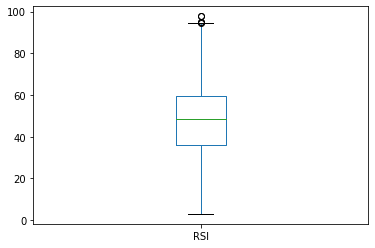

In [102]:
plot_boxplot(df,"RSI")

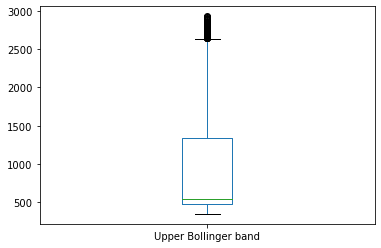

In [103]:
plot_boxplot(df,"Upper Bollinger band")

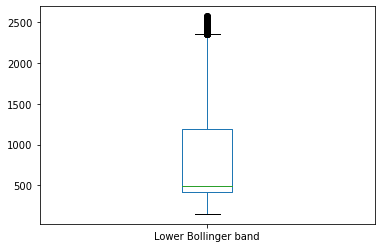

In [104]:
plot_boxplot(df,"Lower Bollinger band")

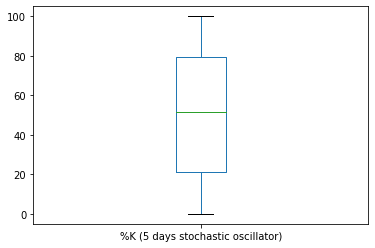

In [105]:
plot_boxplot(df,"%K (5 days stochastic oscillator)")

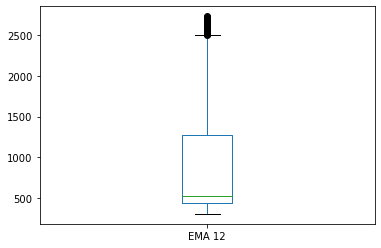

In [106]:
plot_boxplot(df,"EMA 12")

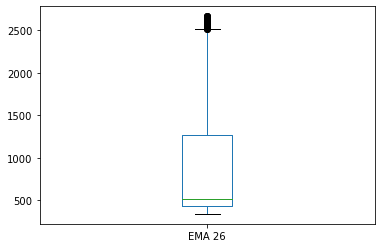

In [107]:
plot_boxplot(df,"EMA 26")

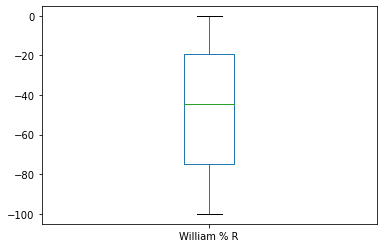

In [108]:
plot_boxplot(df,"William % R")

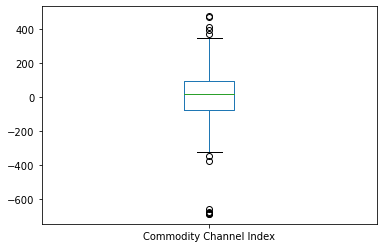

In [109]:
plot_boxplot(df,"Commodity Channel Index")

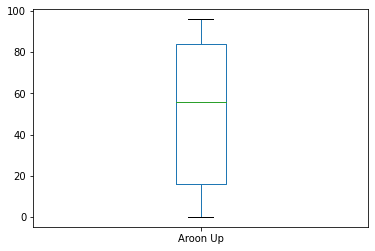

In [110]:
plot_boxplot(df,"Aroon Up")

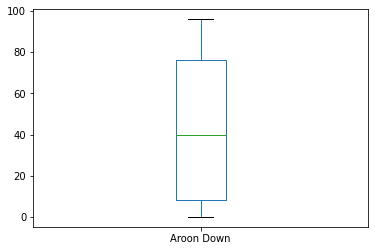

In [111]:
plot_boxplot(df,"Aroon Down")

In [46]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    ls=df.index[(df[ft]<=lower_bound)| (df[ft]>=upper_bound)]
    return ls

In [47]:
index_list=[]
for feature in ['RSI','Upper Bollinger band','Lower Bollinger band','%K (5 days stochastic oscillator)','%D Average(H,3)','EMA 12','EMA 26','Volume Weighted Average Price','William % R','Commodity Channel Index','Aroon Up','Aroon Down','MACD']:
    index_list.extend(outliers(df,feature))

In [48]:
index_list

[645,
 687,
 688,
 1253,
 1254,
 2883,
 2884,
 2885,
 2886,
 2887,
 2888,
 2889,
 2890,
 2891,
 2892,
 2893,
 2894,
 2895,
 2896,
 2897,
 2898,
 2899,
 2900,
 2901,
 2902,
 2903,
 2904,
 2905,
 2906,
 2907,
 2908,
 2909,
 2998,
 2999,
 3000,
 3001,
 3002,
 3003,
 3004,
 3005,
 3006,
 3007,
 3008,
 3009,
 3010,
 3011,
 3012,
 3013,
 3014,
 3015,
 3016,
 3017,
 3018,
 3019,
 3020,
 3021,
 3022,
 3023,
 3024,
 3025,
 3026,
 3027,
 3028,
 3029,
 3030,
 3031,
 3032,
 3033,
 3034,
 3035,
 3036,
 3037,
 3038,
 3039,
 3040,
 3041,
 3042,
 3043,
 3044,
 3045,
 3046,
 3047,
 3048,
 3049,
 3050,
 3051,
 3052,
 3053,
 3054,
 3055,
 3056,
 3057,
 3058,
 3059,
 3060,
 3061,
 3062,
 3063,
 3064,
 3065,
 3066,
 3067,
 3092,
 3093,
 3094,
 3095,
 3096,
 3097,
 3098,
 3099,
 3100,
 3101,
 3102,
 3103,
 3104,
 3105,
 3106,
 3107,
 3108,
 3109,
 3110,
 3111,
 3112,
 2882,
 2883,
 2884,
 2885,
 2886,
 2887,
 2888,
 2889,
 2890,
 2891,
 2892,
 2893,
 2894,
 2895,
 2896,
 2897,
 2898,
 2899,
 2900,
 2901,
 2

In [49]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [50]:
df_clean=remove(df,index_list)

In [51]:
df_clean.shape

(2410, 22)

In [52]:
df.shape

(3113, 22)

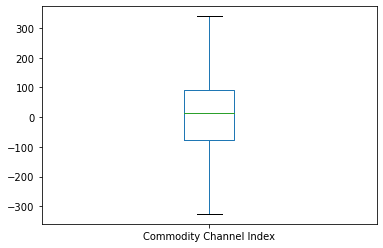

In [119]:
plot_boxplot(df_clean,"Commodity Channel Index")

In [120]:
#Normalization 

In [60]:
df_clean.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'Upper Bollinger band', 'Lower Bollinger band',
       '%K (5 days stochastic oscillator)', '%D Average(H,3)', 'EMA 12',
       'EMA 26', 'Volume Weighted Average Price', 'William % R',
       'Commodity Channel Index', 'Rate of Change (10 days)', 'Aroon Up',
       'Aroon Down', 'MACD', 'BUY/SELL'],
      dtype='object')

In [71]:
X_data=df_clean[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'Upper Bollinger band', 'Lower Bollinger band',
       '%K (5 days stochastic oscillator)', '%D Average(H,3)', 'EMA 12',
       'EMA 26', 'Volume Weighted Average Price', 'William % R',
       'Commodity Channel Index', 'Aroon Up',
       'Aroon Down', 'MACD','BUY/SELL']]

In [72]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2647
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Open                               2410 non-null   float64
 1   High                               2410 non-null   float64
 2   Low                                2410 non-null   float64
 3   Close                              2410 non-null   float64
 4   Adj Close                          2410 non-null   float64
 5   Volume                             2410 non-null   int64  
 6   RSI                                2410 non-null   float64
 7   Upper Bollinger band               2410 non-null   float64
 8   Lower Bollinger band               2410 non-null   float64
 9   %K (5 days stochastic oscillator)  2410 non-null   float64
 10  %D Average(H,3)                    2410 non-null   float64
 11  EMA 12                             2410 non-null   float

In [63]:
X_data=X_data.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
X_data

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
# check the distribution of the target variable
dff['BUY/SELL'].value_counts()

-1.0    1186
 1.0    1030
 0.0     891
Name: BUY/SELL, dtype: int64

In [21]:
X = df[['RSI',
       'Upper Bollinger band', 'Lower Bollinger band',
       '%K (5 days stochastic oscillator)', '%D Average(H,3)', 'EMA 12',
       'EMA 26', 'Volume Weighted Average Price', 'William % R',
       'Commodity Channel Index', 'Aroon Up',
       'Aroon Down', 'MACD']]
y = df['BUY/SELL']

In [22]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
import lightgbm as ltb
model = ltb.LGBMClassifier()

In [36]:
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [18]:
!pip install lightgbm

In [34]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [27]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [28]:
df.fillna(999, inplace=True)

In [33]:
def _assert_all_finite(X):
    """Like assert_all_finite, but only for ndarray."""
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.
    if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
            and not np.isfinite(X).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % X.dtype)